<a href="https://colab.research.google.com/github/jwlee95/DSP_Class2025/blob/main/Ch05_%EC%A3%BC%ED%8C%8C%EC%88%98%EC%98%81%EC%97%AD_%ED%95%B4%EC%84%9D%EC%9D%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 05: 주파수 영역 해석의 기초 (Fundamentals  of  Frequency  Domain  Analysis)

## 5.1 신호의 표현과 주파수

### (주파수) 스펙트럼  

- (주파수) 스펙트럼  
  - 신호가 지닌 진동 특성을 하나 하나의 성분별로 나누어 늘어놓은 것  
  - 신호의 주파수 별 에너지 분포의 개념  
  (예) 햇빛과 프리즘  
     → 신호를 시간이 아닌 주파수의 관점에서 살펴보는 것이 매우 유용하다.  
     → 신호를 보다 기본적인 신호들로 쪼갤 수 있다.  
  (예) 같은 주기를 갖는 두 신호

<center>
<img src='https://drive.google.com/uc?export=download&id=1NMqauMTonNu_8naCpJDQ7YmtHqYmzdFY' width="600" height ="" /><br>

<img src='./images/그림5-1.png' width="600" height ="" /><br>  


---
### 신호의 표현   

- 신호의 표현  
  - 신호를 간단한 기본신호(basis)들의 일차 결합으로 표현할 수 있음  
   → 신호의 표현을 구하는 것은 계수 𝒄_𝒊를 구하는 문제
$$ x(t) = \sum_i c_i \psi_i (t)
$$
- 기본신호들은 다음의 성질을 갖는 것이 바람직함
```
    1) 형태가 단순하고, 신호의 표현을 구하기 쉬어야 한다.  
    2) 다양하고 폭넓은 신호들을 표현할 수 있어야 한다.   
    3) 표현된 신호에 대한 시스템의 응답을 편리하게 표기할 수 있어야 한다.  
    4) 한 주파수에 대해 오직 하나의 기본 신호만 존재(일대일 대응)해야 한다.
```

---
### 정현파와 (주파수) 스펙트럼

- 정현파와 (주파수) 스펙트럼  
  - 정현파는 가장 바람직한 기본 신호의 하나임  
   → 오직 하나의 주파수만 가짐(4번 성질)  
   → 파형이 단순하고 직교성을 지님(1번 성질)  
   → 푸리에 급수/변환에 의해 광범위한 신호들 표현 가능(2번 성질)  
   → 정현파 입력에 대한 출력은 그 크기와 위상만 달라짐(3번 성질)  

- **(주파수) 스펙트럼은 정현파를 주파수의 함수로 취급하여 주파수 축 상에 그 진폭과 위상을 나타낸 것**  
$$ x(t) = A \cos ( 2\pi f_0 t + \phi ) = A \cos (\omega_0 t + \phi )  \\
x(t) = \frac{A}{2} e^{j \phi } e^{j 2\pi f_0 t} + \frac{A}{2} e^{-j \phi } e^{-j 2\pi f_0 t}
$$
  


<center>
<img src='https://drive.google.com/uc?export=download&id=1NO0MC_AysedAsGfHIAKL_g0uLnpBdq3M' width="400" height ="" /><br>

<img src='./images/그림5-2.png' width="400" height ="" /><br>  

---
<img src='https://drive.google.com/uc?export=download&id=1NPb5m9JS4YAh53HNlofUgRLcv8Tvc6H5' width="600" height ="" /><br>   

<img src='./images/EX5-1.png' width="600" height ="" /><br>  



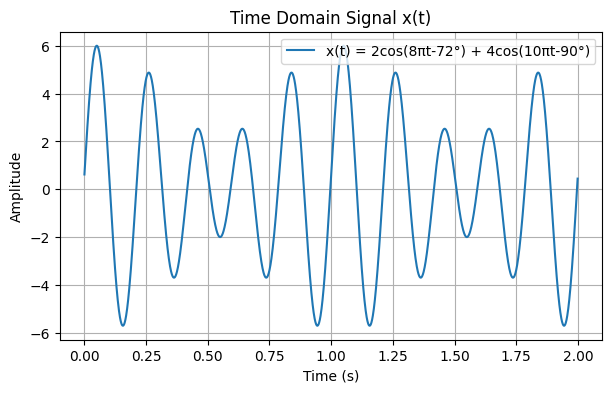

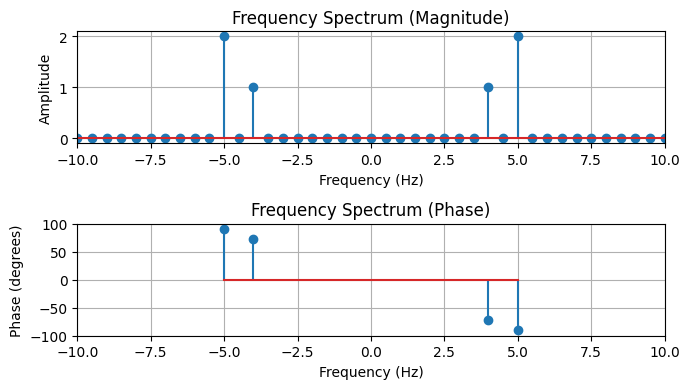

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 신호 정의 및 시간 축 설정
# 샘플링 주파수 (Hz). 신호의 최고 주파수(5Hz)보다 충분히 높게 설정 (새넌의 샘플링 정리)
fs = 1000
# 시간 벡터. 0초부터 2초까지 1/fs 간격으로 생성하여 2주기 이상을 관찰
t = np.arange(0, 2, 1/fs)

# 신호 x(t)의 각 성분 정의
# x(t) = 2*cos(8*pi*t - 72도) + 4*cos(10*pi*t - 90도)
# numpy의 삼각함수는 라디안을 사용하므로, 각도를 라디안으로 변환해야 함 (np.deg2rad)
x1_t = 2 * np.cos(8 * np.pi * t - np.deg2rad(72))
x2_t = 4 * np.cos(10 * np.pi * t - np.deg2rad(90))
x_t = x1_t + x2_t

# 2. 시간 영역(Time Domain) 신호 그리기
plt.figure(figsize=(7, 4))
plt.plot(t, x_t, label='x(t) = 2cos(8πt-72°) + 4cos(10πt-90°)')
plt.title('Time Domain Signal x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# 3. 주파수 스펙트럼 계산 (FFT)
# FFT(고속 푸리에 변환)를 수행하여 주파수 영역으로 변환
N = len(x_t) # 샘플 개수
X_f = np.fft.fft(x_t)

# FFT 결과에 해당하는 주파수 축 생성
freq = np.fft.fftfreq(N, 1/fs)

# FFT 결과는 복소수이므로 크기(magnitude)와 위상(phase)을 계산
# 크기는 원 신호 진폭에 맞춰주기 위해 샘플 개수(N)로 나눔
magnitude = np.abs(X_f) / N
phase = np.angle(X_f, deg=True) # 위상은 각도(degree)로 표현

# 4. 주파수 스펙트럼(Frequency Spectrum) 그리기
# 보기 좋게 0Hz를 중심으로 정렬 (음의 주파수와 양의 주파수를 대칭적으로 표시)
freq_shifted = np.fft.fftshift(freq)
magnitude_shifted = np.fft.fftshift(magnitude)
phase_shifted = np.fft.fftshift(phase)

# 그래프를 위아래로 2개 그리기 위한 설정
fig, axs = plt.subplots(2, 1, figsize=(7, 4))

# 크기 스펙트럼 (Magnitude Spectrum)
# 이론적으로 특정 주파수에서만 값을 가지므로 stem plot이 적합
axs[0].stem(freq_shifted, magnitude_shifted)
axs[0].set_title('Frequency Spectrum (Magnitude)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)
# 주파수 성분이 명확히 보이는 -10Hz ~ 10Hz 범위만 표시
axs[0].set_xlim(-10, 10)


# 위상 스펙트럼 (Phase Spectrum)
# 크기가 매우 작은(거의 0인) 주파수 영역의 위상은 의미가 없으므로,
# 특정 크기(여기서는 0.1) 이상인 지점의 위상만 표시
meaningful_phase_indices = magnitude_shifted > 0.1
axs[1].stem(freq_shifted[meaningful_phase_indices], phase_shifted[meaningful_phase_indices])
axs[1].set_title('Frequency Spectrum (Phase)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (degrees)')
axs[1].grid(True)
axs[1].set_xlim(-10, 10) # 크기 스펙트럼과 x축 범위를 통일
axs[1].set_ylim(-100, 100) # 위상 범위를 적절히 조절


# 그래프 레이아웃 자동 조정
plt.tight_layout()
plt.show()

---
## 5.2 푸리에 급수

### 주기 신호와 푸리에 급수  

- 푸리에 급수 : 주기 신호[$x(t) = x(t+T)$]에 대한 주파수 영역 표현  
  - 주기 신호를 직교함수 기저((복소) 정현파)로 표현한 것  
  → {$ \sin k \omega_0 t , \cos k \omega_0 t$}, {$ e^{j \omega_0 t}$}에 의해 시간 신호를 주파수와 연관시킴

  - 무한 급수 형태가 되므로 수렴 조건에 관한 고려가 반드시 필요함  
  - 주기 신호는 같은 주기를 갖는 정현파(기본파)와 이 정현파의 정수배 주파수를 갖는 정현파(고조파)들의 합으로 표현 가능
$$ \begin{align}
x(t) &= \text{직류}(DC) + \text{기본파}(\cos \text{항} + \sin \text{항}) + \text{고조파들}(\cos \text{항} + \sin \text{항}) \\
&= a_0 + \sum_{k=1}^{\infty} a_k \cos k \omega_0 t + \sum_{k=1}^{\infty} b_k \sin k \omega_0 t
\end{align}
$$

<center>
<img src='https://drive.google.com/uc?export=download&id=1NPj5e0CXhQ2qEPo4wkz6TEtwehjVqtdm' width="600" height ="" /><br>

<img src='./images/그림5-기본고조푸리에급수.png' width="600" height ="" >

<img src='https://drive.google.com/uc?export=download&id=12XsCFYkE2QoSYXuhp78O2nWZTpMMbaro' width="450" height ="" /><br>

<img src='./images/그림5-5.png' width="600" height ="" >
><br>  



---
### 푸리에 급수의 세가지 표현

- 푸리에 급수 표현  
  ▶ 삼각함수형  
$$
x(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos k \omega_0 t + \sum_{k=1}^{\infty} b_k \sin k \omega_0 t
$$  

  ▶ 간결형 삼각함수형  
   - 삼각함수 합성을 이용하여 삼각함수형을 변형
$$ \begin{align}
& a_k \cos k \omega_0 t + b_k \sin k \omega_0 t \\
 &= \sqrt{a_k^2 + b_k^2} \left( \frac{a_k}{\sqrt{a_k^2 + b_k^2}} \cos k \omega_0 t + \frac{b_k}{\sqrt{a_k^2 + b_k^2}} \sin k \omega_0 t  \right) \\
 &= \sqrt{a_k^2 + b_k^2} \left(  \cos(-\phi_k) \cos k \omega_0 t + \sin(-\phi_k) \sin k \omega_0 t  \right) \\
 &= c_k \cos(k \omega_0 t + \phi_k )
\end{align}
$$  
$$
x(t) = c_0 + \sum_{k=1}^{\infty} c_k \cos ( k \omega_0 t + \phi_k ) \;\;
\left\{\begin{matrix}
C_0 = a_0 \\
c_k = \sqrt{a_k^2 + b_k^2}, \;\; k=1,2,3, \dots \\
\phi_k = - \tan^{-1} \frac{b_k}{a_k}, \;\; k=1,2,3, \dots
\end{matrix}\right.
$$

 ▶ 지수함수형  
  - Euler 공식을 이용, 삼각함수형의 삼각함수를 복소 지수함수로 치환
$$ \begin{align}
x(t) &= a_0 + \sum_{k=1}^{\infty} ( a_k \cos k \omega_0 t + b_k \sin k \omega_0 t ) \\
&= a_0 + \sum_{k=1}^{\infty} \left( a_k \frac{e^{jk\omega_0 t} + e^{-jk\omega_0 t}}{2} + b_k \frac{e^{jk\omega_0 t} - e^{-jk\omega_0 t}}{2j} \right)    \tag{5.6}  \\
&= a_0 + \sum_{k=1}^{\infty} \left( \frac{a_k - j b_k}{2} e^{jk\omega_0 t}+  \frac{a_k + j b_k}{2} e^{-jk\omega_0 t}\right) \\
&= \sum_{k=-\infty}^{\infty} X_k e^{jk\omega_0 t}
\end{align}
$$
$$
X_k = \left\{\begin{matrix}
& \frac{1}{2} (a_k - jb_k), \;\; k \gt 0 \\
& a_0, \;\; k=0 \\
& \frac{1}{2} (a_k + jb_k), \;\; k \lt 0
\end{matrix}\right.  \tag{5.7}
$$

 $X_k$ 는 복소수, $X_k = X^*_{-k}$를 만족한다.

<center>
 <img src='https://drive.google.com/uc?export=download&id=1NUvsIQXFHQIaHOMm6XF3kZvTcrt_YS3f' width="800" height ="" /><br>  

 <img src='./images/표5-1.png' width="700" height ="" /><br>  

 </center>
 ---  

 - 식(5-6)의 양변에 $e^{j m \omega_0 t}$와 내적을 취하여 정리하면...
 $$
X_m = \frac{1}{T} \int^{T}_{0} x(t) e^{-jm\omega_0 t} dt  \tag{5.12}
 $$

---
### 푸리에 급수의 수렴 조건  

- 푸리에 급수의 수렴 조건 ⇒ Dirichlet 조건  

 <img src='https://drive.google.com/uc?export=download&id=1NVgWu-2fuc8NgK6et2_HD4J-2h0X9q0W' width="600" height ="" /><br>

---
<img src='https://drive.google.com/uc?export=download&id=1NWDw-3dUgoK258PG1igS9si94HHc9ru1' width="600" height ="" /><br>  

<img src='./images/EX5-2.png' width="600" height ="" /><br>  

---
### 푸리에 급수와 스펙트럼  

- 푸리에 급수와 스펙트럼  
  - 주기 신호의 진폭과 위상에 관한 주파수 정보를 표현   
  - 진폭스펙트럼 : 주파수 $\omega$에 대해 진폭($c_k$ 또는 $|X_k|$)을 표시한 그래프    
  - 위상스펙트럼 : 주파수 $\omega$에 대해 위상($\theta_k$ 또는 $ \angle X_k$)을 표시한 그래프  
  - 주파수 분해 : 푸리에 급수에 의해 시간 신호로부터 스펙트럼을 구하는 과정   
  - 주파수 합성 : 스펙트럼으로부터 푸리에 급수에 의해 정현파들을 합하여 주기 신호 를 만들어내는(복원하는) 과정

<center>
<img src='https://drive.google.com/uc?export=download&id=1NXceZsuBl5bA-vdADq8O4UiVq9-cs8MO' width="700" height ="" /><br>

<img src='./images/그림5-7.png' width="700" height ="" /><br>  

</center>

---
<img src='https://drive.google.com/uc?export=download&id=1NZBcIN5sQGbbT67PjSHrEudMaeHeIEA-' width="700" height ="" /><br>   

<img src='./images/EX5-3.png' width="700" height ="" /><br>  

---

- 진폭스펙트럼의 의미와 역할  
  - 신호가 갖는 다양한 주파수 성분의 양(정현파의 진폭)을 표시  
  - 파형의 시간적 변화가 완만한 신호는 진폭 스펙트럼의 감쇠가 급격함   
  → 고조파의 기여도가 약함  
  → 조파합성시 적은 개수의 항만으로도 충분히 근사화됨  
  - 시간적으로 급격히 변화하는 신호는 진폭 스펙트럼의 감쇠가 완만함    
   → 고조파의 기여도가 큼  
   → 조파합성시 많은 개수의 항을 이용해야만 충분히 근사화됨  
  - 신호의 m차 도함수가 처음으로 불연속  
   → 진폭 스펙트럼은 적어도 $\frac{1}{k^{m+1}}$비율로 감쇠


---  

  - Gibbs 현상  
    - 조파합성시 고조파의 수를 아무리 늘려도 불연속점 근처에서 항상 불연속 크기의 약 9%의 오버슈트가 생기며, 고조파 수에 비례하여 진동도 더 빨라지는 현상

<center>

<img src='https://drive.google.com/uc?export=download&id=1NglaRYjdRaI5-GRYZyuGvBiaJ_Q9gy4d' width="400" height ="" /><br>

<img src='./images/그림5-10.png' width="400" height ="" /><br>  

- 위상스펙트럼의 역할  
  - 진폭스펙트럼이 같아도 위상스펙트럼이 달라지면 신호 파형이 달라짐    
  - 모든 주파수 성분이 시간축상을 같은 시간 간격으로 이동해야만 신호의 파형이 그대로 유지됨  
  → 각 고조파가 주파수에 비례하는 위상각만큼 달라지면 됨(선형위상)  
  - 점프 불연속점과 같은 급격한 변화가 있는 신호의 경우 불연속점에서 모든 고조파 성분이 동일한 부호 변화를 보이며 0점을 통과하도록 위상이 일치해야 함  

- 위상스펙트럼의 영향  

<center>

<img src='https://drive.google.com/uc?export=download&id=1NhkhfN8iXR_q7J1s9dSk0v0DUpvBAj4P' width="500" height ="" /><br>  

<img src='./images/그림5-11.png' width="500" height ="" /><br>  


<img src='https://drive.google.com/uc?export=download&id=1NhVU4ALpUVJd3MV6rYaRnzKBouBgeGpo' width="600" height ="" /><br>

 <img src='./images/그림5-12.png' width="600" height ="" /><br>  

---

 <img src='https://drive.google.com/uc?export=download&id=1NiYhL7uWQ9mThiobzWX2NygPNP5xhyaP' width="600" height ="" /><br>

 <img src='./images/EX5-4.png' width="600" height ="" /><br>  

---

### 푸리에 급수의 주요 성질  

- 신호를 시간 축에 대해 상하 이동시킬 경우(DC 오프셋의 변화)
  - DC 항만 달라짐 & 기본파 및 고조파의 진폭 및 위상은 불변
$$ x' (t) = x(t) + \alpha = \alpha + c_0 + \sum_{k=1}^{\infty} c_k \cos ( k\omega_0 t + \phi_k )
$$  
- 신호를 시간 축에 대해 좌우 이동시킬 경우 (시간 선행 또는 시간 지연)  
  - 진폭 스펙트럼은 불변 & 위상 스펙트럼은 시간이동 값에 비례해 변화  
$$
\begin{align}
x' (t) = x(t-t_0)  &= c_0 + \sum_{k=1}^{\infty} c_k \cos ( k\omega_0 (t-t_0 ) + \phi_k ) \\
&= c_0 + \sum_{k=1}^{\infty} c_k \cos ( k\omega_0 t + \phi_k - k\omega_0 t_0 )
\end{align}
$$

- $a$만큼 진폭이동(상하 이동)된 신호 $y(t) = x(t) + a$ 의 푸리에 급수
$$
y(t) = x(t) + a = \sum_{k= - \infty}^{\infty} Y_k e^{jk\omega_0 t}
 = \sum_{k= - \infty}^{-1} X_k e^{jk\omega_0 t} + X_0 + a
   + \sum_{k=1}^{\infty} X_k e^{jk\omega_0 t}
$$

- $t_0$만큼 시간 이동(좌우 이동)된 신호 $y(t)=x(t-t_0 )$의 푸리에 급수   
$$
y(t) = x(t - t_0 ) = \sum_{k= - \infty}^{\infty} Y_k e^{jk\omega_0 t}
 = \sum_{k= - \infty}^{-1} X_k e^{jk\omega_0 (t - t_0 )}
 = \sum_{k= - \infty}^{-1} X_k e^{-jk\omega_0 t_0 }  e^{jk\omega_0 t}
$$

- 즉, $Y_k = e^{-jk\omega_0 t_0 } X_k$이므로 $|Y_k|=|X_k|, \; \angle Y_k = \angle X_k - k\omega_0 t_0 $가 된다.

---
- 파스발(`Parseval's theorem`) 정리  
  - 시간영역에서 구한 신호 전력 = 주파수영역에서 구한 신호 전력    
  - 푸리에 급수에서 서로 다른 주파수 성분 간에는 전력을 만들지 않는다!  
$$
\begin{align}
P  &= \frac{1}{T} \int_T |x(t)|^2 \;dt = \frac{1}{T} \int_T \left|
\sum_{k=-\infty}^{\infty} X_k e^{jk\omega_0 t}  \right|^2 \; dt  \\
&= \frac{1}{T} \int_T \left( \sum_{k=-\infty}^{\infty} X_k e^{jk\omega_0 t}  \right)   
\left( \sum_{m=-\infty}^{\infty} X^{\ast}_m e^{-jm\omega_0 t}  \right) \; dt \\
&= \frac{1}{T} \sum_{k=-\infty}^{\infty} \int_T \left( \sum_{m=-\infty}^{\infty} X_k X_m^*  e^{jk\omega_0 t} e^{-m\omega_0 t} \right) \; dt  \\
&= \frac{1}{T} \sum_{k=-\infty}^{\infty} X_k X_k^* T =  \sum_{k=-\infty}^{\infty} |X_k |^2  \tag{5.17}
\end{align}
$$

그런데, $X_{-k}= X^*_k$로 부터 $|X_{-k}|= |X_k|$이고, 간결형 삼각함수 푸리에 급수의 표현식(식 5-8)로 부터, k고조파 cos의 진폭 $c_k = 2 |X_k|$,    
실효값 $\bar{c_k} = \sqrt{2} |X_k|$ (단, $c_0 = \bar{c_0} = X_0 )$이므로, (5-16)은 다음과 같이 쓸 수 있다.

$$
P =  \sum_{k=-\infty}^{\infty} | X_k |^2 = |X_0|^2 + \sum_{k=1}^{\infty} 2| X_k |^2   \tag{5.18}
$$

$$
P =  c_0^2 + \sum_{k=1}^{\infty} \left( \frac{c_k}{ \sqrt{2}} \right)^2  
   = \sum_{k=0}^{\infty} \bar{c_k}^{2} =  \sum_{k=0}^{\infty} P_k  \tag{5.19}
$$

---
<img src='https://drive.google.com/uc?export=download&id=1NjOPcCnvrzPyxkiwStzXUXWyR0vyOl7b' width="700" height ="" /><br>   

<img src='./images/EX5-5.png' width="700" height ="" /><br>  

---


## 5.3 푸리에 변환

### 푸리에 변환의 개요  

- 푸리에 변환 : 비주기 신호에 대한 주파수 영역 표현  
  - 비주기 신호를 주기 $T = \infty$인 주기 신호로 취급 → 푸리에 급수 확장
$$ x(t) = \lim_{T \rightarrow \infty} x_T (t)
$$  
  - 주기 𝑻 가 커질수록 스펙트럼은 소밀해짐 → 𝑻=∞ 면 연속 파형이 됨      
  ⇒ 푸리에 표현은 급수 전개에서 적분 형태로 바뀜 → ***푸리에 변환***




<center>
<img src='https://drive.google.com/uc?export=download&id=1NlgvDVtFSoFv2WIwU-CIWpWttdo8K5Lp' width="600" height ="" /><br>  

<img src='./images/그림5-14.png' width="600" height ="" /><br>  

<img src='https://drive.google.com/uc?export=download&id=1NkSZVTH6_1oSYkKrrfU-qXbL2XeuFOIr' width="600" height ="" /><br>

<img src='./images/그림5-14-1.png' width="600" height ="" /><br>  

---
- 푸리에 변환의 유도  
  - 주기 신호의 푸리에 급수 전개에서 Fourier계수 식(5-12)을 이용하여, Fourier series 식(5.6)을 다시 정리하면
$$ x(t) = \sum_{k=-\infty}^{\infty} X_k e^{jk\omega_0 t} =
\sum_{k=-\infty}^{\infty} \left(  \frac{\omega_0}{2\pi} \int_{ -T/2}^{T/2} x(t) e^{ -jk\omega_0 t} \; dt  \right) e^{ jk\omega_0 t}
 \tag{5.20}
$$  
- 여기서 $\dfrac{\omega_0}{2\pi}$ 은 $\dfrac{1}{T}$을 의미함.


  - $T \rightarrow \infty, \; \omega_0 \rightarrow d\omega, \; n\omega_0 \rightarrow \omega,\; \sum \rightarrow \int$로 치환하면
$$ \begin{align}
x(t) &= \int_{-\infty}^{\infty} \left[  \frac{d\omega}{2\pi} \int_{ -\infty}^{\infty} x(t) e^{ -j\omega t} \; dt  \right] e^{ j\omega t} \\
&=  \frac{1}{2\pi} \int_{-\infty}^{\infty} \left[  \int_{ -\infty}^{\infty} x(t) e^{ -j\omega t} \; dt  \right] e^{ j\omega t} \; d\omega   \tag{5.21}
\end{align}
$$
   


- 푸리에 변환의 정의
  - 비주기 신호를 연속적인 주파수를 갖는 복소 정현파 $e^{j\omega t}$의 성분별로 표시한 것

   푸리에 변환 (FT : Fourier Transform):
   $$
   X(\omega) = \mathfrak{F} \{ x(t) \} =  \int_{-\infty}^{\infty} x(t) e^{-j\omega t} \; dt  \tag{5.22}
   $$
   
   역 푸리에 변환 ( IFT : Inverse Fourier Transform):
   $$ x(t) = \mathfrak{F}^{-1} \{ X(\omega) \}  = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega) e^{j\omega t} \; d\omega  \tag{5.23}
   $$



- 푸리에 변환의 수렴조건  
  - 비주기 신호 대상이므로 Dirichlet 조건에서 주기성이 삭제되어 바뀜  
 <img src='https://drive.google.com/uc?export=download&id=1Nq3NKvZlZx9iO_O-uJwGcdDbAy_-BLXC' width="500" height ="" /><br>    $\tag{5.24}$   
<img src='./images/그림5-Dirichlet조건.png' width="500" height ="" /><br>  

  - 에너지 신호는 푸리에 변환의 수렴 조건 만족함  
  - 전력신호(예 : 계단신호, 주기신호)는 푸리에 변환 수렴 조건 만족 않음      
     → 특별히 푸리에 변환이 존재하는 것으로 취급  
     → **전력 신호의 푸리에 변환은 주파수 영역에서 임펄스 함수를 포함**  


- 그림5-18 "신호의 시간 영역 및 주파수 영역 표현과 변환" 참조...
---
- [2판] 예제 5-9: 임펄스로 표현되는 시간 신호 및 스펙트럼의 Fourier transform pair...   
$$
\delta(t) \Leftrightarrow 1 \\
1 \Leftrightarrow  2\pi \delta(\omega)
$$

<img src='https://drive.google.com/uc?export=download&id=1NtANSTogg0hTiURvIC_6rX-pg45kz7CI' width="700" height ="" /><br>    

<img src='./images/EX5-6.png' width="700" height ="" /><br>  


- [2판] 예제 5-10: 정현파 신호의 Fourier transform pair...   

- [2판] 예제 5-11: 실수지수 신호의 Fourier transform pair...   
실수지수 신호 $x(t) = e^{-at} u(t)$
$$
\begin{align}
X(\omega) &= \int^{\infty}_{0} e^{-at} e^{-j\omega t} = - \dfrac{1}{a+j\omega} e^{-(a+j\omega) t} |^{\infty}_{0} =  \dfrac{1}{a+j\omega} \\
&= \dfrac{a}{a^2 + \omega^2} - j \dfrac{\omega}{a^2 + \omega^2} = \dfrac{1}{ \sqrt{a^2 + \omega^2}} e^{j \angle{ -\tan^{-1} \frac{\omega}{a}} }
\end{align}
$$


$$
e^{-at} u(t) \Leftrightarrow  \dfrac{1}{a+j\omega}   \tag{5.29}
$$

<img src='https://drive.google.com/uc?export=download&id=1Nw3c0meZjyEgSEwidmKQAaoDtQdOxwqC' width="700" height ="" /><br>   

<img src='./images/EX5-7.png' width="700" height ="" /><br>  

---

### 5.3.3 주기 신호의 푸리에 변환  

- 주기 신호의 푸리에 변환  
  - $X_k$는 $X( \omega )$를 $\frac{1}{T}$배하여 고조파 수파수 에서 샘플링한 값을 의미함.  
  - $X_T (\omega )$는 $X( \omega )$를 $\omega_0$배하여 고조파 수파수 에서 임펄스 샘플링한 것을 의미함.   
$$
x_T (t) = \sum_{k=-\infty}^{\infty} X_k e^{jk\omega_0 t}  \tag{5.30}
$$

$$ \begin{align}
X_T (\omega ) &= \int_{-\infty}^{\infty} x_T (t) e^{-j\omega t} \; dt =
    \int_{-\infty}^{\infty} \left( \sum_{k=-\infty}^{\infty} X_k e^{jk\omega_0 t}  \right)  e^{-j\omega t} \; dt \\
    &= \sum_{k=-\infty}^{\infty} X_k \int_{-\infty}^{\infty} ( e^{jk\omega_0 t} ) e^{-j\omega t} \; dt  \\
    &=  2\pi \sum_{k=-\infty}^{\infty} X_k \delta (\omega - k\omega_0 )   \tag{5.31}
\end{align}
$$
$$
X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} \; dt  \tag{5.32}
$$
  - 그런데  
$$     x(t) = \left\{\begin{matrix}
x_T (t) , \;\; -T/2 \le t \le T/2 \\
0 , \;\; \text{그 외.}
\end{matrix}\right.
$$  이므로 주기 신호의 푸리에 계수 $X_k$는 다음과 같이 된다.
$$ X_k = \frac{1}{T} \int_T x_T (t) e^{-jk\omega_0 t} \; dt
   = \frac{1}{T} \int_{-\infty}^{\infty} x(t) e^{-jk\omega_0 t} \; dt = \frac{1}{T}X(k\omega_0 )  \tag{5.33}
$$

$x_T (t)$의 푸리에 변환 $X_T (\omega)$는 식(5.31)과 식(5.33)으로부터 다음과 같이 된다.

$$   
X_T (\omega ) = \frac{2\pi}{T} \sum_{k=-\infty}^{\infty} X(k\omega_0 ) \delta (\omega - k\omega_0 ) = \omega_0 \sum_{k=-\infty}^{\infty} X(k\omega_0 ) \delta (\omega - k\omega_0 )   \tag{5.34}
$$  

  
 ⇒ 주기 신호 스펙트럼 : 비주기 신호의 스펙트럼을 샘플링한 이산 함수 선스펙트럼의 간격은 기본 주파수 $\omega_0$임   

 **⇒ 주의: 주기 신호의 스펙트럼은 기본 주파수의 정수 배인 $k\omega_0$에서만 존재하는 불연속적인 이산 함수이다.**










---
### 5.3.4 푸리에 변환의 성질  

- 시간-주파수 쌍대성  
  - 변환과 역변환 연산의 수식 구조가 동일  
   → 시간 변수와 주파수 변수를 서로 바꾸어도 변환쌍 관계가 유효함  

$$ x(t) \Leftrightarrow X(\omega) \rightarrow X(t) \Leftrightarrow 2\pi x(-\omega) \tag{5.35}
$$

  - 푸리에 변환쌍에 $ \omega \rightarrow t,\; t \rightarrow -\omega$로 치환하면
$$ X (t) = \int_{-\infty}^{\infty} x(-\omega) e^{-jt(-\omega)} \; (-d\omega )  = \int_{-\infty}^{\infty} x(-\omega) e^{j\omega t} \; d\omega \tag{5.36}
$$

$$
x (-\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(t) e^{jt(-\omega)} \; dt  = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(t) e^{-j\omega t} \; dt   \tag{5.37}
$$



---
[2판] 예제 5-9: 임펄스로 표현되는 시간 신호 및 Fourier transform pair...


<img src='https://drive.google.com/uc?export=download&id=1NwSkxdlXiwXIHOZjCwZQy-MOtN0XpFR_' width="650" height ="" /><br>

<img src='./images/EX5-8.png' width="650" height ="" /><br>  
---

---
#### 변조(Modulation)
- 진폭 변조(Amplitude modulation)    
  - 신호 $x(t)$)에 정현파 $ \cos \omega_0$를 곱하여 정현파의 진폭을 변조                   
   → 신호의 주파수 대역 이동에 사용
$$ \begin{align}
\mathfrak{F} \{ x(t) \cos \omega_0 t \} &= \frac{1}{2} \int_{-\infty}^{\infty} \left[  x(t) ( e^{j\omega_0 t} + e^{-j\omega_0 t} )\right] e^{-j\omega t} \; dt \\
&= \frac{1}{2} \left( \int_{-\infty}^{\infty}  x(t) ( e^{-j(\omega - \omega_0) t}\; dt +  \int_{-\infty}^{\infty}  x(t) ( e^{-j(\omega + \omega_0) t}\; dt  \right)  \tag{5.40} \\
&= \frac{1}{2} \left( X(\omega - \omega_0 ) + X(\omega + \omega_0 )    \right)
\end{align}
$$


<center>
<img src='https://drive.google.com/uc?export=download&id=1NxXvLlNuZJXNEVyYsd7MnOiRGR5-m09e' width="700" height ="" /><br>   

<img src='./images/그림5-16.png' width="700" height ="" /><br>  

</center>
---


<center>

<img src='https://drive.google.com/uc?export=download&id=1O5hCj2FlbOtHni7djjlWA6Zn_IusSMcE' width="650" height ="" /><br>  

<img src='./images/표5-2.png' width="650" height ="" /><br>  

<center>

<img src='https://drive.google.com/uc?export=download&id=1OHnihN7yAmNTcWtb3siL4DdUEvPIwRcQ' width="650" height ="" /><br>

<img src='./images/표5-2-1.png' width="650" height ="" /><br>  

---  
[예제 5-13] 푸리에 변환(FT)의 성질을 이용한 푸리에변환...

<img src='https://drive.google.com/uc?export=download&id=1OJVEboAh5p2dy2D8OxUiRtmw_Epl0ipt' width="600" height ="" /><br>  


<img src='./images/EX5-10.png' width="600" height ="" /><br>  

> `참고` : 싱크함수(sinc function)는 사인함수와 그 변수의 비로 나타내어지는 함수로 $sinc(x)$ 로 나타낸다. 크게 정규화가 되었는지 유무를 기준으로 하는 두 가지 정의가 있는데, 디지털 신호처리나 정보이론에서는 정규화된 싱크함수(Normalized Sinc Function를 다음과 같이 정의하여 사용한다.
$$ \mathrm {sinc} (x)={\dfrac {\sin(\pi x)}{\pi x}}.$$
이것을 정규화되었다고 하는데, 이 함수의 푸리에 변환이 구형함수(Rectangular Function)이고 그 적분값이 동일하기 때문이다.  
수학에서는, 비정규화된 싱크함수(Unnormalized Sinc Function)를 다음과 같이 정의하여 사용한다.
$$ \mathrm {Sa} (x)={\frac {\sin(x)}{x}}. $$

---
## Q&A  